In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy import signal
from math import exp
import processes.foundation as fd
from math import exp, sqrt, pi, erfc
from lmfit import Model
import csv
from pygama import __version__ as pygama_version
import pygama
import pygama.lgdo as lgdo
import pygama.lgdo.lh5_store as lh5
import json

In [26]:
cwd = os.getcwd()
file = cwd + '/address.json'
with open(file, 'r') as read_file:
    data = json.load(read_file)

t1_dir = data['tier1_dir']


f_raw = t1_dir + '/Run' + str(6994) + '.lh5'
raw_store = lh5.LH5Store()
lh5_file = raw_store.gimme_file(f_raw, 'r')

lh5_tables = []
lh5_keys = lh5.ls(f_raw)
buffer_len = 10000000000000000
t1_data = []


tot_n_rows = raw_store.read_n_rows(lh5_keys[1], f_raw)

chan_name = lh5_keys[1].split('/')[0]
hv, n_rows_read = raw_store.read_object(lh5_keys[1], f_raw, start_row=0, n_rows=buffer_len)


In [27]:
dictionary = dict()
for col in hv:
    dictionary[col] = hv[col].nda

df = pd.DataFrame(data=dictionary)

In [28]:
df["voltage"] = df["voltage"]/1000000

Text(0, 0.5, 'Voltage [V]')

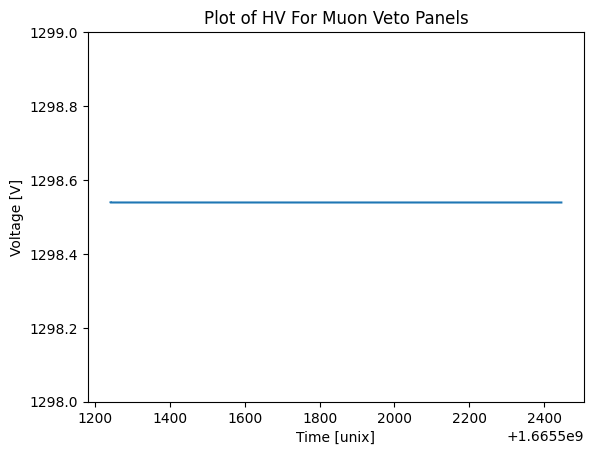

In [46]:
plt.plot(df.loc[df["channel"]==0]["timestamp"], df.loc[df["channel"]==0]["voltage"])

plt.ylim(1298, 1299)
plt.title("Plot of HV For Muon Veto Panels")
plt.xlabel("Time [unix]")
plt.ylabel("Voltage [V]")

In [36]:
df.loc[df["channel"]==0]["voltage"]

0       1298.539063
16      1298.539062
32      1298.539058
48      1298.539057
64      1298.539058
           ...     
3408    1298.539037
3424    1298.539036
3440    1298.539036
3456    1298.539035
3472    1298.539034
Name: voltage, Length: 218, dtype: float64

In [4]:
cwd = os.getcwd()
file = cwd + '/address.json'
with open(file, 'r') as read_file:
    data = json.load(read_file)

t1_dir = data['tier1_dir']


f_raw = t1_dir + '/Run' + str(6994) + '.lh5'
raw_store = lh5.LH5Store()
lh5_file = raw_store.gimme_file(f_raw, 'r')

lh5_tables = []
lh5_keys = lh5.ls(f_raw)
buffer_len = 10000000000000000
t1_data = []
print(lh5_keys)


#tot_n_rows = raw_store.read_n_rows(lh5_keys[1], f_raw)

#chan_name = lh5_keys[1].split('/')[0]
#hv, n_rows_read = raw_store.read_object(lh5_keys[1], f_raw, start_row=0, n_rows=buffer_len)

['Card1', 'HV1']
